# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data\\cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

In [3]:
print(cities)

['barrow', 'mys shmidta', 'busselton', 'arraial do cabo', 'praia', 'nizhneyansk', 'acuitzio', 'ngukurr', 'nantucket', 'at-bashi', 'carnarvon', 'siocon', 'rikitea', 'mamit', 'deputatskiy', 'albany', 'jamestown', 'atuona', 'hasaki', 'jalu', 'yeniseysk', 'faanui', 'mataura', 'georgetown', 'chokurdakh', 'pangnirtung', 'mahebourg', 'inirida', 'hilo', 'yulara', 'dikson', 'nikolskoye', 'vaini', 'sao joao da barra', 'illoqqortoormiut', 'barentsburg', 'hithadhoo', 'chuy', 'san patricio', 'sentyabrskiy', 'tsihombe', 'fortuna', 'taolanaro', 'chimbote', 'sobolevo', 'sampit', 'barabai', 'port elizabeth', 'saint anthony', 'kairana', 'tual', 'tarrafal', 'yirol', 'shaoxing', 'punta arenas', 'halifax', 'kapaa', 'tuktoyaktuk', 'vao', 'gigmoto', 'sitka', 'olafsvik', 'sorland', 'bredasdorp', 'ribeira grande', 'vila franca do campo', 'monrovia', 'severo-kurilsk', 'bambous virieux', 'yellowknife', 'chernyshevskiy', 'amalapuram', 'upernavik', 'attawapiskat', 'cape town', 'charters towers', 'avera', 'sancti s

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key+"&q=olga"
olga=requests.get(url).json()
olga

In [4]:
weather_api_key='b7040594e7bfe4dfd4b7efa04aea91b9'
counter=0
for city in cities:
    if counter == 1:
        break
    url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key+"&q="+city
    city=requests.get(url).json()
    #print(city)
    counter+=1
    
    name=city['name']
    weather=city['weather']
    idx=city['id']
    print(name,weather,idx)
    

Barrow [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}] 5880054


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create empty list
city_data=[]
for c in cities[:40]:
# Parse the JSON and retrieve data
    url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key+"&q="+c
    city_weather = requests.get(url)
    city_weather = city_weather.json()
    print(city_weather)
    

    if city_weather['cod']==200:
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City":city_weather['name'],
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


{'coord': {'lon': -156.79, 'lat': 71.29}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 14, 'feels_like': -2.2, 'temp_min': 14, 'temp_max': 14, 'pressure': 1017, 'humidity': 78}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1604923378, 'sys': {'type': 1, 'id': 7649, 'country': 'US', 'sunrise': 1604952546, 'sunset': 1604967187}, 'timezone': -32400, 'id': 5880054, 'name': 'Barrow', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 115.33, 'lat': -33.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 52.16, 'feels_like': 40.53, 'temp_min': 48.99, 'temp_max': 55, 'pressure': 998, 'humidity': 66}, 'visibility': 10000, 'wind': {'speed': 17.09, 'deg': 242}, 'rain': {'1h': 0.18}, 'clouds': {'all': 43}, 'dt': 1604923379, 'sys': {'type': 3, 'id': 2011706, 'country': 'AU', 

{'coord': {'lon': 21.55, 'lat': 29.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.64, 'feels_like': 67.35, 'temp_min': 74.64, 'temp_max': 74.64, 'pressure': 1018, 'humidity': 37, 'sea_level': 1018, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 11.56, 'deg': 314}, 'clouds': {'all': 0}, 'dt': 1604923382, 'sys': {'country': 'LY', 'sunrise': 1604897560, 'sunset': 1604936563}, 'timezone': 7200, 'id': 86049, 'name': 'Jalu', 'cod': 200}
{'coord': {'lon': 92.17, 'lat': 58.45}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 35.31, 'feels_like': 27.7, 'temp_min': 35.31, 'temp_max': 35.31, 'pressure': 1008, 'humidity': 88, 'sea_level': 1008, 'grnd_level': 998}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 219}, 'clouds': {'all': 88}, 'dt': 1604923383, 'sys': {'country': 'RU', 'sunrise': 1604885182, 'sunset': 1604

{'coord': {'lon': -53.46, 'lat': -33.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 67.05, 'feels_like': 63.19, 'temp_min': 67.05, 'temp_max': 67.05, 'pressure': 1021, 'humidity': 66, 'sea_level': 1021, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'speed': 9.75, 'deg': 74}, 'clouds': {'all': 98}, 'dt': 1604923385, 'sys': {'country': 'UY', 'sunrise': 1604910380, 'sunset': 1604959750}, 'timezone': -10800, 'id': 3443061, 'name': 'Chui', 'cod': 200}
{'coord': {'lon': -97.52, 'lat': 28.02}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 64.81, 'feels_like': 66.74, 'temp_min': 64.4, 'temp_max': 64.99, 'pressure': 1013, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 120}, 'clouds': {'all': 20}, 'dt': 1604923385, 'sys': {'type': 1, 'id': 3705, 'country': 'US', 'sunrise': 1604926058, 'sunset': 1604965223}, 'timezo

In [6]:
weather_df=pd.DataFrame(city_data)
weather_df.to_csv(output_data_file, index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
weather_df[weather_df['Humidity']>100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

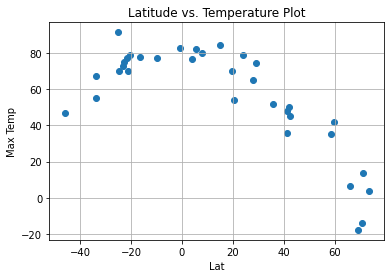

In [9]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o")
plt.title("Latitude vs. Temperature Plot")
plt.ylabel("Max Temp")
plt.xlabel("Lat")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

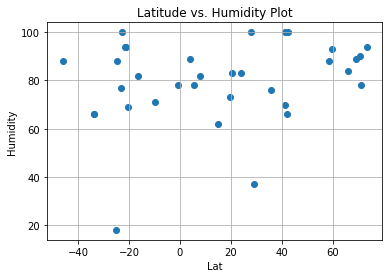

In [10]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o")
plt.title("Latitude vs. Humidity Plot")
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

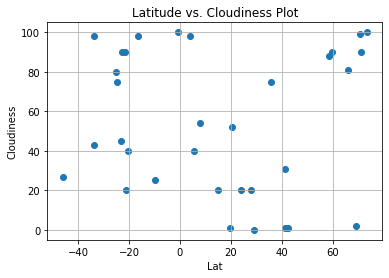

In [11]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o")
plt.title("Latitude vs. Cloudiness Plot")
plt.ylabel("Cloudiness")
plt.xlabel("Lat")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

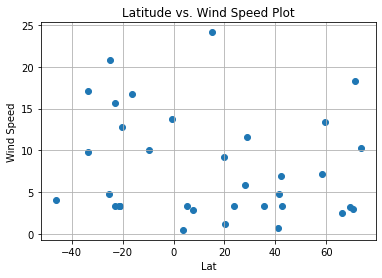

In [12]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o")
plt.title("Latitude vs. Wind Speed Plot")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

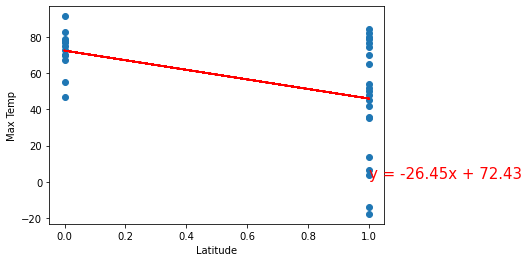

The r-value is: -0.4541946676465035


In [13]:
x_values = weather_df['Lat']>=0
y_values = weather_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

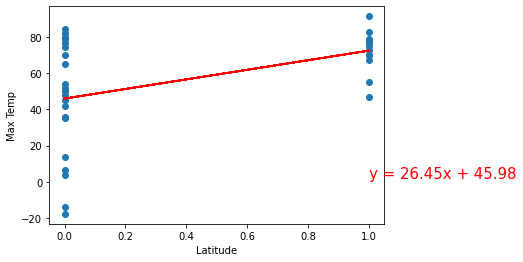

The r-value is: 0.4541946676465035


In [14]:
x_values = weather_df['Lat']<0
y_values = weather_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

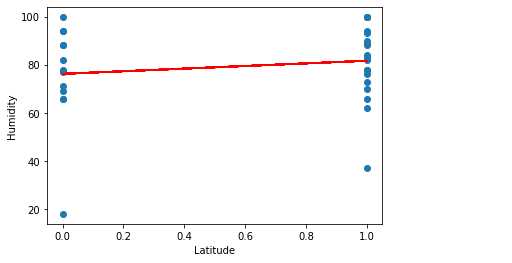

The r-value is: 0.15527816041898962


In [15]:
x_values = weather_df['Lat']>=0
y_values = weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

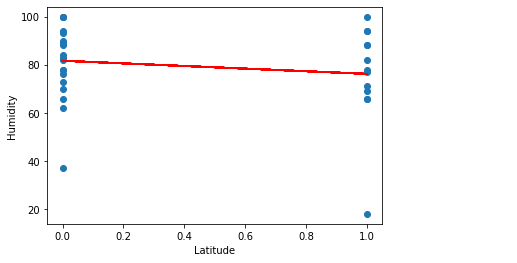

The r-value is: -0.15527816041898962


In [16]:
x_values = weather_df['Lat']<0
y_values = weather_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [17]:
x_values = weather_df['Lat']>=0
y_values = weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is: {rvalue}"))

SyntaxError: unmatched ')' (<ipython-input-17-26d16864eabd>, line 12)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

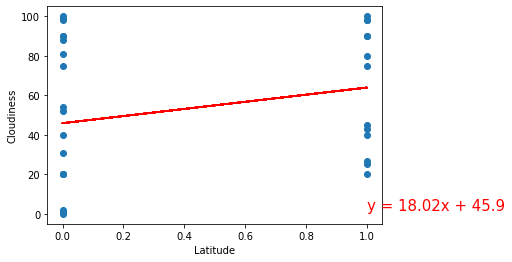

The r-value is: 0.24116942718890802


In [18]:
x_values = weather_df['Lat']<0
y_values = weather_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

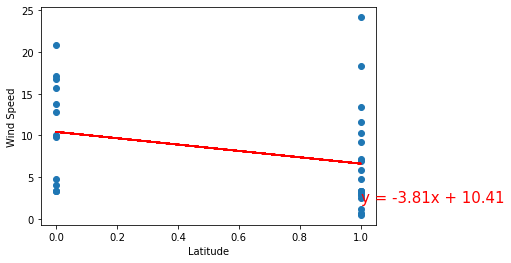

The r-value is: -0.2968922656205383


In [19]:
x_values = weather_df['Lat']>=0
y_values = weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

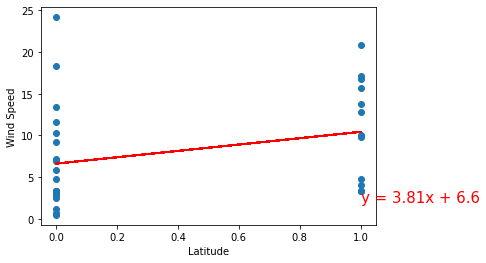

The r-value is: 0.2968922656205383


In [20]:
x_values = weather_df['Lat']<0
y_values = weather_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,2),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()
print(f"The r-value is: {rvalue}")